A Multilayer Neural Network implementation using TensorFlow library.

This example is using XOR data

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# XOR definition
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [[0], [1], [1], [0]]

# Neural Network Parameters
N_STEPS = 40000
N_EPOCH = 1000
N_TRAINING = len(X) # 4

N_INPUT_NODES = 2
N_HIDDEN_NODES = 1
N_OUTPUT_NODES = 1
LEARNING_RATE = 0.05

# Create placeholders for variables and define Neural Network structure
x_ = tf.placeholder(tf.float32, shape=[N_TRAINING, N_INPUT_NODES], name="x-input")
y_ = tf.placeholder(tf.float32, shape=[N_TRAINING, N_OUTPUT_NODES], name="y-input")

theta1 = tf.Variable(tf.random_uniform([N_INPUT_NODES, N_HIDDEN_NODES], -1, 1), name="theta1")
theta2 = tf.Variable(tf.random_uniform([N_HIDDEN_NODES, N_OUTPUT_NODES], -1, 1), name="theta2")

bias1 = tf.Variable(tf.zeros([N_HIDDEN_NODES]), name="bias1")
bias2 = tf.Variable(tf.zeros([N_OUTPUT_NODES]), name="bias2")

# Use a sigmoidal activation function
layer1 = tf.sigmoid(tf.matmul(x_, theta1) + bias1)
output = tf.sigmoid(tf.matmul(layer1, theta2) + bias2)

# Cross Entropy cost function
cost = - tf.reduce_mean((y_ * tf.log(output)) + (1 - y_) * tf.log(1.0 - output))
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

cost_history = np.empty(shape=[1], dtype=float)
for i in range(N_STEPS):
  sess.run(train_step, feed_dict={x_: X, y_: Y})
  if i % N_EPOCH == 0:
      print('Batch ', i)
      print('Inference ', sess.run(output, feed_dict={x_: X, y_: Y}))
      print('Cost ', sess.run(cost, feed_dict={x_: X, y_: Y}))
      cost_history = np.append(cost_history, sess.run(cost, feed_dict={x_: X, y_: Y}))

Instructions for updating:
Colocations handled automatically by placer.
Batch  0
Inference  [[0.56547576]
 [0.5927801 ]
 [0.53919864]
 [0.5671642 ]]
Cost  0.70287585
Batch  1000
Inference  [[0.5014168 ]
 [0.5220041 ]
 [0.47913647]
 [0.49690577]]
Cost  0.69220304
Batch  2000
Inference  [[0.5040258 ]
 [0.53069156]
 [0.47425184]
 [0.49335814]]
Cost  0.69019336
Batch  3000
Inference  [[0.5053774 ]
 [0.55161387]
 [0.4613003 ]
 [0.48636684]]
Cost  0.6847048
Batch  4000
Inference  [[0.49893546]
 [0.60197324]
 [0.43571654]
 [0.47175226]]
Cost  0.666879
Batch  5000
Inference  [[0.47075492]
 [0.7025243 ]
 [0.39689383]
 [0.4411694 ]]
Cost  0.62384355
Batch  6000
Inference  [[0.42892075]
 [0.81132734]
 [0.3639875 ]
 [0.40326977]]
Cost  0.5740592
Batch  7000
Inference  [[0.39810276]
 [0.8801048 ]
 [0.3475929 ]
 [0.37762174]]
Cost  0.5415784
Batch  8000
Inference  [[0.3798654 ]
 [0.91767347]
 [0.34053046]
 [0.3634746 ]]
Cost  0.5231785
Batch  9000
Inference  [[0.36885953]
 [0.9392054 ]
 [0.33727705]

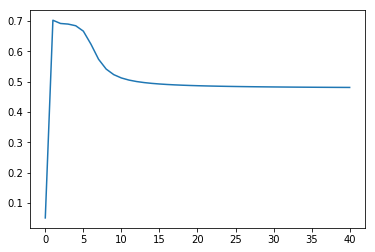

In [4]:
plt.plot(range(len(cost_history)), cost_history)